## Linear Regression Coefficients

Linear regression is a straightforward approach for predicting a quantitative response Y on the basis of a different predictor variable X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we can write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**The magnitud of the coefficients is directly influenced by the scale of the features**. Therefore, to compare coefficients accross features, it is importance to have all features within the same scale. This is why, normalisation is important for variable importance and feature selection in linear models. Normalisation is important as well for model performance.

In addition, Linear Regression makes the following assumptions over the predictor variables X:
- Linear relationship with the outcome Y
- Multivariate normality (X should follow a Gaussian distribution)
- No or little multicollinearity (Xs should not be linearly related to one another)
- Homoscedasticity (variance should be the same)

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Therefore, there are a lot of assumptions that need to be met in order to make a fair comparison of the features by using only their regression coefficients.

In addition, these coefficients may be penalised by regularisation, therefore being smaller than if we were to compare only that individual feature with the target.

Having said this, you can still select features based on linear regression coefficients, provided you keep all of these in mind at the time of analysing the outcome.

Personally, this is not my feature selection method of choice, although I find it useful to interpret the output of the model.


I will demonstrate how to select features based on the regression coefficients using sklearn on a regression problem, using the House Price dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

### Regression

In [2]:
# load dataset
data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [3]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [5]:
# the features in the house dataset are in very
# different scales
# in addition, to select features based on coefficients,
# the features need to be in the same scale

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# here, again I will train a Linear regression and select
# features with higher coefficients all in one line of code.

# the LinearRegression object from sklearn is a non-regularised
# linear method. It fits by matrix multiplication and not 
# gradient descent.

# therefore I don't need to specify penalty and other parameters

sel_ = SelectFromModel(LinearRegression())
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        prefit=False, threshold=None)

In [7]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

7

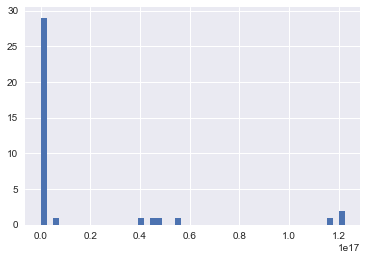

In [8]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=50)

In [9]:
# and now, let's compare the  amount of selected features
# with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(np.abs(sel_.estimator_.coef_) > np.abs(sel_.estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


Same as before, it selects those features which coefficient are greater than the mean of all feature coefficients.

That is all for this lecture, I hope you enjoyed it and see you in the next one!